In [47]:
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
# install openpyxl


from tqdm import tqdm

pd.set_option('display.min_rows', 20)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [48]:
df = pd.read_excel('combined_edges_str.xlsx', dtype={'source': str, 'target': str})

### Logic: "source"/follower is following "target"

### Brand IDs

- 290081566 => @EsteeLauder

- 18148242 => @dermalogica

- 91259072 => @Neutrogena

- 44693072 => @cerave

- 132543891 => @SkinCeuticals


In [49]:
brand_list = ['1_@EsteeLauder', '2_@dermalogica', '3_@Neutrogena', '4_@cerave', '5_@SkinCeuticals']

In [50]:
for colname in ['source', 'target']:
    df.loc[df[colname]=='290081566', colname] = brand_list[0]
    df.loc[df[colname]=='18148242', colname] = brand_list[1]
    df.loc[df[colname]=='91259072', colname] = brand_list[2]
    df.loc[df[colname]=='44693072', colname] = brand_list[3]
    df.loc[df[colname]=='132543891', colname] = brand_list[4]

In [51]:
df

,source,target
0,1550173096744722432,4_@cerave
1,557884816,4_@cerave
2,1529429483387817985,4_@cerave
3,1578652520800555008,4_@cerave
4,1456425924,4_@cerave
5,2853150560,4_@cerave
6,1528726407995658241,4_@cerave
7,3084597184,4_@cerave
8,1392075915363065856,4_@cerave
9,1560415649729585155,4_@cerave


In [52]:
df.source[0]

'1550173096744722432'

In [53]:
## Num of followings
pd.DataFrame(df.source.value_counts())

,source
2_@dermalogica,1225
5_@SkinCeuticals,997
1_@EsteeLauder,452
3_@Neutrogena,432
4_@cerave,196
1568382218002735105,4
1572625750003441664,4
1572641040032567301,4
1409136155384221698,4
3059011803,4


In [54]:
## Num of followers
pd.DataFrame(df.target.value_counts())

,target
4_@cerave,5001
5_@SkinCeuticals,5001
2_@dermalogica,5001
1_@EsteeLauder,5000
3_@Neutrogena,5000
14222518,5
40965341,5
19247844,5
19658436,5
19546942,5


# Following/follower matrix:

In [55]:
def prep_matrix(df, colname='source', col_rename='following'):
    df_res = pd.DataFrame(df[colname].value_counts()).reset_index()
    df_res.columns = ['id', col_rename]
    #df_res = df_res.loc[df_res[col_rename] > 1, :]

    for b in brand_list:
        df_res[b] = 0

    return df_res

### 1. df_source: what brands people are following

In [56]:
# df_source = prep_matrix(df, colname='source', col_rename='following')

# for i in tqdm(range(len(df_source))):
#     targets = list(df[df['source'] == df_source.id[i]]['target'])
#     for j in brand_list:
#         if j in targets:
#             df_source.loc[i, j] = 1
            
# df_source['n_brand_following'] = np.sum(df_source.iloc[:, [2,3,4,5,6]], axis=1)

In [57]:
## Checking
# len(df_source) - np.sum(df_source.following == df_source['n_brand_following'])

## Output: 5

In [58]:
## Save CSV
# df_source.to_csv('m1_source.csv')

In [59]:
## Load CSV
df_source = pd.read_csv('m1_source.csv', index_col=0)

In [60]:
df_source

,id,following,1_@EsteeLauder,2_@dermalogica,3_@Neutrogena,4_@cerave,5_@SkinCeuticals,n_brand_following
0,2_@dermalogica,1225,0,0,0,0,0,0
1,5_@SkinCeuticals,997,0,1,0,1,0,2
2,1_@EsteeLauder,452,0,0,0,0,0,0
3,3_@Neutrogena,432,0,0,0,0,0,0
4,4_@cerave,196,0,0,0,0,1,1
5,1568382218002735105,4,1,0,1,1,1,4
6,1572625750003441664,4,1,0,1,1,1,4
7,1572641040032567301,4,1,0,1,1,1,4
8,1409136155384221698,4,1,0,1,1,1,4
9,3059011803,4,0,1,1,1,1,4


In [61]:
pd.DataFrame(df_source.n_brand_following.value_counts())

,n_brand_following
1,23597
2,567
3,80
4,8
0,3


In [62]:
big_fans = df_source[df_source.n_brand_following == 4].id.tolist()
big_fans

['1568382218002735105',
 '1572625750003441664',
 '1572641040032567301',
 '1409136155384221698',
 '3059011803',
 '1565358112172818434',
 '1556000179081416706',
 '1541449042604990465']

### Matrix 1. df_source: what brands people are following

### Analysis:

Among the brand followers we collected, 567 users are following 2 brands, 80 users are following 3 brands, 8 users are following 4 brands.

### Define big_fans:

The 8 users who follow 4 brands are: 

['1568382218002735105',
 '1572625750003441664',
 '1572641040032567301',
 '1409136155384221698',
 '3059011803',
 '1565358112172818434',
 '1556000179081416706',
 '1541449042604990465']

(array([3.0000e+00, 0.0000e+00, 2.3597e+04, 0.0000e+00, 0.0000e+00,
        5.6700e+02, 0.0000e+00, 8.0000e+01, 0.0000e+00, 8.0000e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

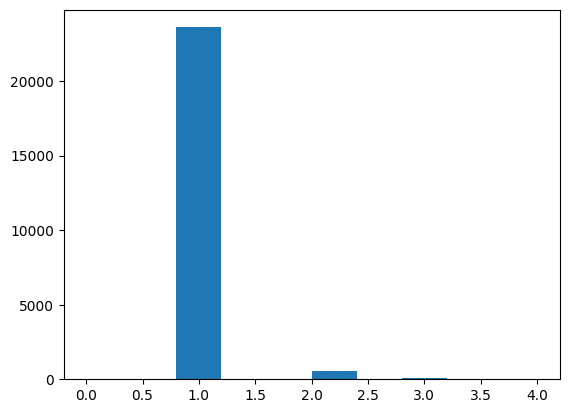

In [63]:
plt.hist(df_source.n_brand_following)

### 2. df_target: what brands are following them

In [64]:
# df_target = prep_matrix(df, colname='target', col_rename='follower')

# for i2 in tqdm(range(len(df_target))):
#     sources = list(df[df['target'] == df_target.id[i2]]['source'])
#     for j2 in brand_list:
#         if j2 in sources:
#             df_target.loc[i2, j2] = 1
            
# df_target['n_brand_follower'] = np.sum(df_target.iloc[:, [2,3,4,5,6]], axis=1)

In [65]:
## Checking
# len(df_target) - np.sum(df_target.follower == df_target['n_brand_follower'])

## Output: 5

In [66]:
## Save CSV
# df_target.to_csv('m2_target.csv')

In [67]:
## Load CSV
df_target = pd.read_csv('m2_target.csv', index_col=0)

In [68]:
df_target

,id,follower,1_@EsteeLauder,2_@dermalogica,3_@Neutrogena,4_@cerave,5_@SkinCeuticals,n_brand_follower
0,4_@cerave,5001,0,0,0,0,1,1
1,5_@SkinCeuticals,5001,0,0,0,1,0,1
2,2_@dermalogica,5001,0,0,0,0,1,1
3,1_@EsteeLauder,5000,0,0,0,0,0,0
4,3_@Neutrogena,5000,0,0,0,0,0,0
5,14222518,5,1,1,1,1,1,5
6,40965341,5,1,1,1,1,1,5
7,19247844,5,1,1,1,1,1,5
8,19658436,5,1,1,1,1,1,5
9,19546942,5,1,1,1,1,1,5


In [69]:
pd.DataFrame(df_target.n_brand_follower.value_counts())

,n_brand_follower
1,2445
2,222
3,64
4,44
5,9
0,2


In [70]:
brand_icons = df_target[df_target.n_brand_follower == 5].id.tolist()
brand_icons

['14222518',
 '40965341',
 '19247844',
 '19658436',
 '19546942',
 '15279429',
 '32469566',
 '14934818',
 '482591078']

### Matrix 2. df_target: what brands are following them

### Analysis

Among the accounts that the brands are following, 222 accounts are followed by 2 brands, 64 accounts are followed by 3 brands, 44 accounts are followed by 4 brands, 9 accounts are followed by 5 brands. 

### Define brand_icons:

The 9 accounts that are followed by 5 brands are: 

['14222518',
 '40965341',
 '19247844',
 '19658436',
 '19546942',
 '15279429',
 '32469566',
 '14934818',
 '482591078']

(array([2.000e+00, 0.000e+00, 2.445e+03, 0.000e+00, 2.220e+02, 0.000e+00,
        6.400e+01, 0.000e+00, 4.400e+01, 9.000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

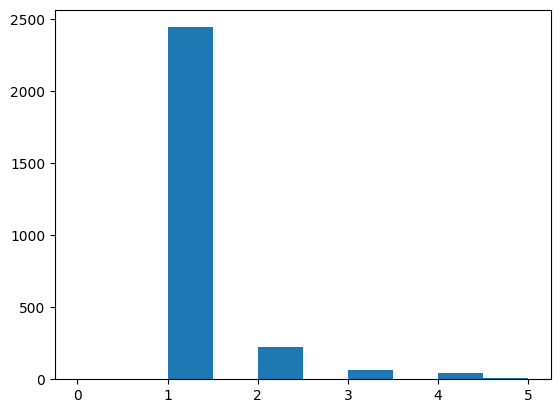

In [71]:
plt.hist(df_target.n_brand_follower)

### Matrix 1

In [72]:
for aa in big_fans:
    print(aa, '---', list(df[df['source'] == aa]['target']))

1568382218002735105 --- ['4_@cerave', '1_@EsteeLauder', '3_@Neutrogena', '5_@SkinCeuticals']
1572625750003441664 --- ['4_@cerave', '1_@EsteeLauder', '3_@Neutrogena', '5_@SkinCeuticals']
1572641040032567301 --- ['4_@cerave', '1_@EsteeLauder', '3_@Neutrogena', '5_@SkinCeuticals']
1409136155384221698 --- ['4_@cerave', '1_@EsteeLauder', '3_@Neutrogena', '5_@SkinCeuticals']
3059011803 --- ['4_@cerave', '2_@dermalogica', '3_@Neutrogena', '5_@SkinCeuticals']
1565358112172818434 --- ['4_@cerave', '2_@dermalogica', '1_@EsteeLauder', '5_@SkinCeuticals']
1556000179081416706 --- ['4_@cerave', '1_@EsteeLauder', '3_@Neutrogena', '5_@SkinCeuticals']
1541449042604990465 --- ['4_@cerave', '2_@dermalogica', '3_@Neutrogena', '5_@SkinCeuticals']


In [73]:
for aa in big_fans:
    print(aa, '---', list(df[df['target'] == aa]['source']))

1568382218002735105 --- []
1572625750003441664 --- []
1572641040032567301 --- []
1409136155384221698 --- []
3059011803 --- []
1565358112172818434 --- []
1556000179081416706 --- []
1541449042604990465 --- []


In [74]:
df_source.head(5)

,id,following,1_@EsteeLauder,2_@dermalogica,3_@Neutrogena,4_@cerave,5_@SkinCeuticals,n_brand_following
0,2_@dermalogica,1225,0,0,0,0,0,0
1,5_@SkinCeuticals,997,0,1,0,1,0,2
2,1_@EsteeLauder,452,0,0,0,0,0,0
3,3_@Neutrogena,432,0,0,0,0,0,0
4,4_@cerave,196,0,0,0,0,1,1


### Matrix 2

In [75]:
for bb in brand_icons:
    print(bb, '---', list(df[df['target'] == bb]['source']))

14222518 --- ['5_@SkinCeuticals', '4_@cerave', '1_@EsteeLauder', '2_@dermalogica', '3_@Neutrogena']
40965341 --- ['5_@SkinCeuticals', '4_@cerave', '1_@EsteeLauder', '2_@dermalogica', '3_@Neutrogena']
19247844 --- ['5_@SkinCeuticals', '4_@cerave', '1_@EsteeLauder', '2_@dermalogica', '3_@Neutrogena']
19658436 --- ['5_@SkinCeuticals', '4_@cerave', '1_@EsteeLauder', '2_@dermalogica', '3_@Neutrogena']
19546942 --- ['5_@SkinCeuticals', '4_@cerave', '1_@EsteeLauder', '2_@dermalogica', '3_@Neutrogena']
15279429 --- ['5_@SkinCeuticals', '4_@cerave', '1_@EsteeLauder', '2_@dermalogica', '3_@Neutrogena']
32469566 --- ['5_@SkinCeuticals', '4_@cerave', '1_@EsteeLauder', '2_@dermalogica', '3_@Neutrogena']
14934818 --- ['5_@SkinCeuticals', '4_@cerave', '1_@EsteeLauder', '2_@dermalogica', '3_@Neutrogena']
482591078 --- ['5_@SkinCeuticals', '4_@cerave', '1_@EsteeLauder', '2_@dermalogica', '3_@Neutrogena']


In [76]:
for bb in brand_icons:
    print(bb, '---', list(df[df['source'] == bb]['target']))

14222518 --- []
40965341 --- []
19247844 --- []
19658436 --- []
19546942 --- []
15279429 --- []
32469566 --- []
14934818 --- []
482591078 --- []


In [77]:
df_target.head(5)

,id,follower,1_@EsteeLauder,2_@dermalogica,3_@Neutrogena,4_@cerave,5_@SkinCeuticals,n_brand_follower
0,4_@cerave,5001,0,0,0,0,1,1
1,5_@SkinCeuticals,5001,0,0,0,1,0,1
2,2_@dermalogica,5001,0,0,0,0,1,1
3,1_@EsteeLauder,5000,0,0,0,0,0,0
4,3_@Neutrogena,5000,0,0,0,0,0,0
